## Setting Things Up

In [1]:
# importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle



In [2]:
# reading titanic dataset using read csv 
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# printing the first five datasets using df.head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Exploring the Dataset

In [4]:
#printing all the columns in dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#basic summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#getting shape of the data
df.shape

(891, 12)

In [7]:
#convering data types
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


## Step 3: Encoding Categorical Data

In [8]:
# Initializing the LabelEncoder to encode categorical values
encoder = LabelEncoder()

# Converting the 'Sex' column into numeric values: 0 for 'female' and 1 for 'male'
df.Sex = encoder.fit_transform(df['Sex'])

# Displaying the encoded 'Sex' column
df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [9]:
dict(zip(encoder.classes_, range(len(encoder.classes_))))

{'female': 0, 'male': 1}

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), int32(1), string(4)
memory usage: 86.3 KB


## Step 4: Summarizing Numerical Data

In [11]:
# getting  summary of the statistics for numerical columns in a DataFrame.
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,891.000000,714.0,891.0,891.0,891.0
mean,446.0,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.0,0.0,1.0,0.000000,0.42,0.0,0.0,0.0
25%,223.5,0.0,2.0,0.000000,20.125,0.0,0.0,7.9104
50%,446.0,0.0,3.0,1.000000,28.0,0.0,0.0,14.4542
75%,668.5,1.0,3.0,1.000000,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,1.000000,80.0,8.0,6.0,512.3292


In [12]:
# The df.duplicated().sum() will give the count of duplicate rows in the DataFrame.
df.duplicated().sum()

0

## Step 5: Handling Missing Values

In [13]:
# The df.isnull().sum() will give the count of missing (null) values in each column of the DataFrame.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Filling missing numerical values with the median of each column
df = df.fillna(df.median(numeric_only=True))

In [15]:
# forward fill
df = df.ffill()
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [16]:
# backward fill
df = df.bfill()
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
df.Pclass.unique()

<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64

In [18]:
df['Survived'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [19]:
df['Sex'].unique()

array([1, 0])

In [20]:

# Selecting rows where 'Sex' is 1 (i.e., male) using loc method
df.loc[df.Sex == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,C85,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,C123,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.075,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",1,28.0,0,0,C.A./SOTON 34068,10.5,C50,S
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.05,C50,S
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,C50,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C


In [21]:
# Selecting rows where 'Sex' is 1 (i.e., male) using query method
df.query("Sex == 1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,C85,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,C123,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.075,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",1,28.0,0,0,C.A./SOTON 34068,10.5,C50,S
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.05,C50,S
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,C50,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C


## Step 6: Visualizing the Data


In [23]:
# Counting the occurrences of each unique value in the 'Pclass' column
count = df.Pclass.value_counts()

# Displaying the counts of each passenger class (Pclass)
count

Pclass
3    491
1    216
2    184
Name: count, dtype: Int64

Text(0.5, 1.0, 'Distribution of Passenger Classes in the Dataset')

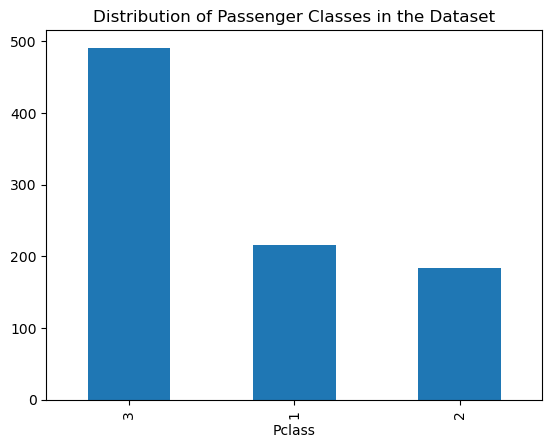

In [53]:
# This code creates a bar plot to visually represent the frequency of each unique value in the 'Pclass' column.
count.plot(kind = 'bar',)
plt.title("Distribution of Passenger Classes in the Dataset")

Text(0.5, 1.0, 'Distribution of Siblings/Spouses Among Passengers')

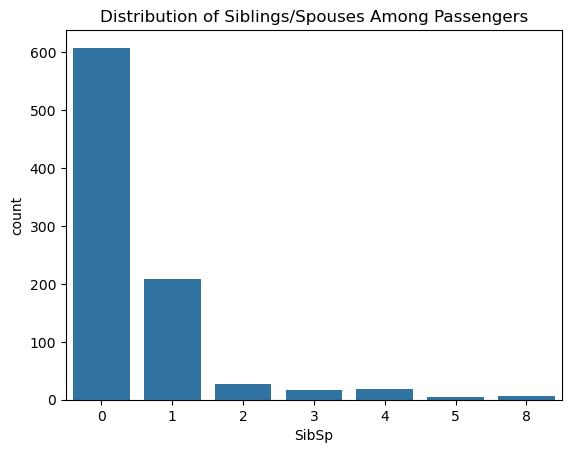

In [54]:
# Creating a count plot to visualize the distribution of values in the 'SibSp' column (number of siblings/spouses aboard)
sns.countplot(df,x = 'SibSp')
plt.title("Distribution of Siblings/Spouses Among Passengers")

In [26]:
# sns.countplot(df,x = 'Pclass')

In [27]:
# Visualize age distribution

<Axes: >

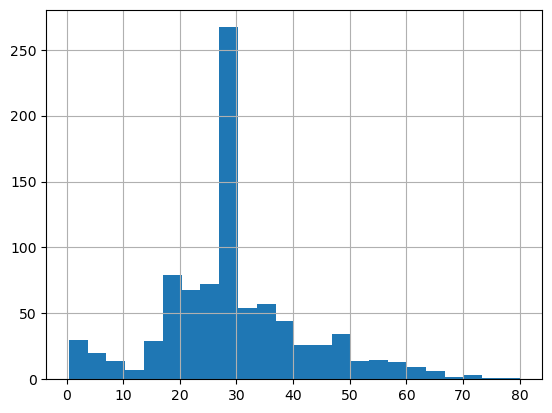

In [28]:
# Plotting a histogram of the 'Age' column with 24 bins to visualize the distribution of passengers' ages
df['Age'].hist(bins = 24)

In [29]:
# Getting the mode (most frequent value) of the 'Age' column
df.Age.mode()

0    28.0
Name: Age, dtype: Float64

In [30]:
# Counting the occurrences of each unique value in the 'Pclass' column (passenger class)
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: Int64

In [31]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Survived'>

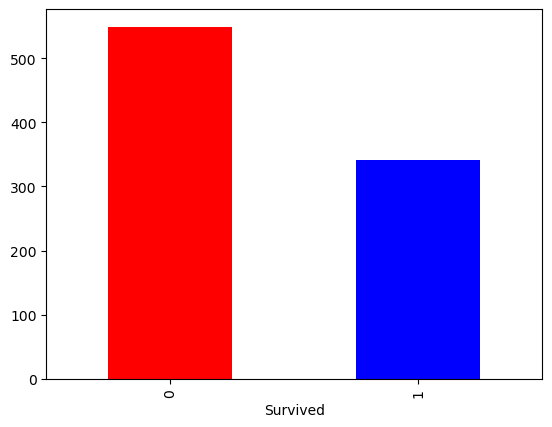

In [32]:
# Creating a bar plot to visualize the distribution of survival outcomes ('Survived' column),
# with 'red' for non-survivors and 'blue' for survivors
df.Survived.value_counts().plot(kind='bar',color = ['red','blue'])

In [33]:
 # Creating a cross-tabulation between 'Survived' and 'Pclass' columns, 
# with the 'margins=True' option to include row and column totals
pd.crosstab(df["Survived"],df["Pclass"],margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [34]:
# Calculating the correlation matrix for numerical columns in the DataFrame
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000


<Axes: >

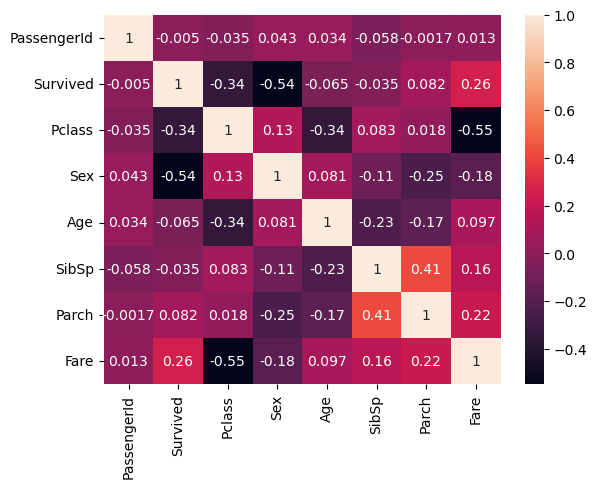

In [35]:
# Creating a heatmap to visualize the correlation matrix of numerical columns,
# with annotations to show the correlation values between each pair of features

sns.heatmap(df.corr(numeric_only=True),annot=True)

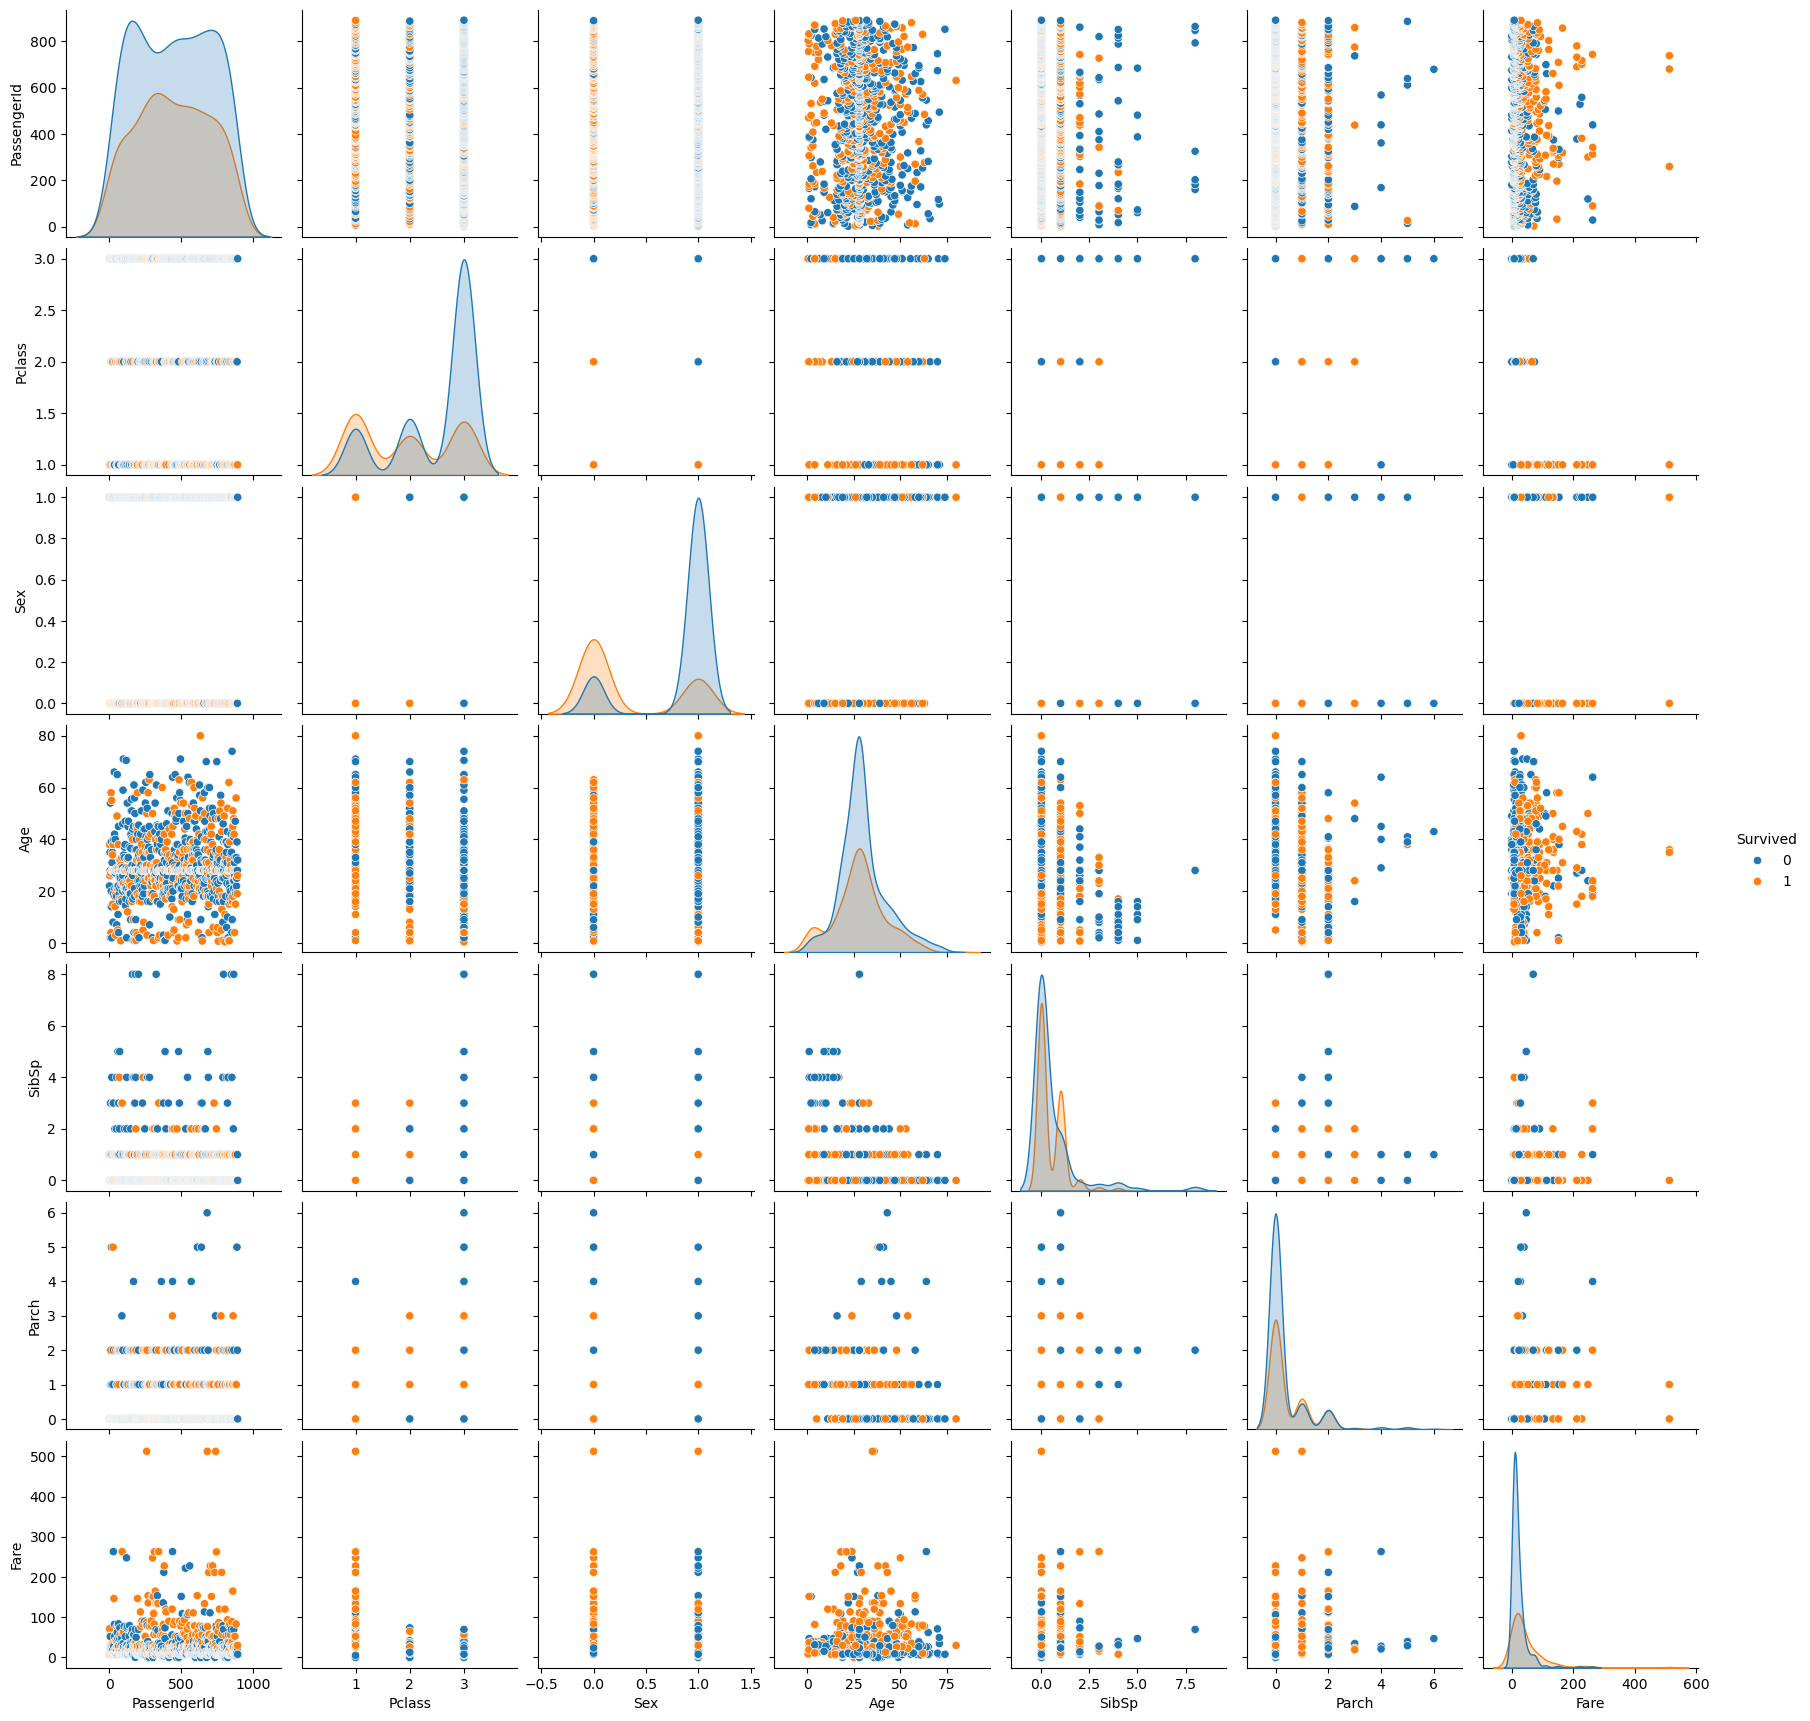

In [36]:
# Creating a pairplot to visualize the relationships between numerical features, 
# colored by the 'Survived' column to differentiate between passengers who survived and those who did not
sns.pairplot(hue='Survived',data=df)

## Step 7: Selecting Features

In [37]:
# Calculating the absolute correlation of each numerical column with the 'Survived' column, 
# and sorting them in descending order to identify the features most strongly correlated with survival
df.corr(numeric_only=True)["Survived"].apply(lambda x:abs(x)).sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [38]:
features = df[['Sex','Pclass','Fare','Parch','Age']]

In [39]:
features.head()

,Sex,Pclass,Fare,Parch,Age
0,1,3,7.25,0,22.0
1,0,1,71.2833,0,38.0
2,0,3,7.925,0,26.0
3,0,1,53.1,0,35.0
4,1,3,8.05,0,35.0


In [40]:
target = df['Survived']

In [41]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: Int64

## Step 8: Splitting the Data

In [42]:
# Splitting the dataset into training and testing sets
# 'features' contains the input variables, 'target' contains the output variable
# 80% of the data is used for training, and 20% for testing, with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [43]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression


## Step 9: Training the Model

In [44]:
#Initializing a logistic regression model for classification

model = LogisticRegression()

In [45]:
#fitting the data in the model
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
# Evaluating the accuracy of the model on the test data (X_test and y_test)
model.score(X_test,y_test)

0.7932960893854749

In [47]:
features.columns

Index(['Sex', 'Pclass', 'Fare', 'Parch', 'Age'], dtype='object')

## Step 10: Making Predictions

In [48]:
data =pd.DataFrame({
    'Sex': [1],        # Encoded value for 'male' (0 for female, 1 for male)
    'Pclass': [3],     # Passenger class (e.g., 1 for 1st class, 2 for 2nd, 3 for 3rd)
    'Fare': [15.5],    # Fare paid by the passenger
    'Parch': [0],      # Number of parents/children aboard
    'Age': [22]        # Age of the passenger
})

In [49]:
model.predict(data)

array([0.])

## Step 11: Saving and Reloading the Model

In [50]:
# Saving the model using pickle
with open('logistic_model.pkl','wb') as file:
    pickle.dump(model,file)

In [51]:
# Loading the saved model using pickle
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [52]:
# Using the loaded model to make predictions on the input data (data)
loaded_model.predict(data)

array([0.])

In [ ]:
#Thank You